# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


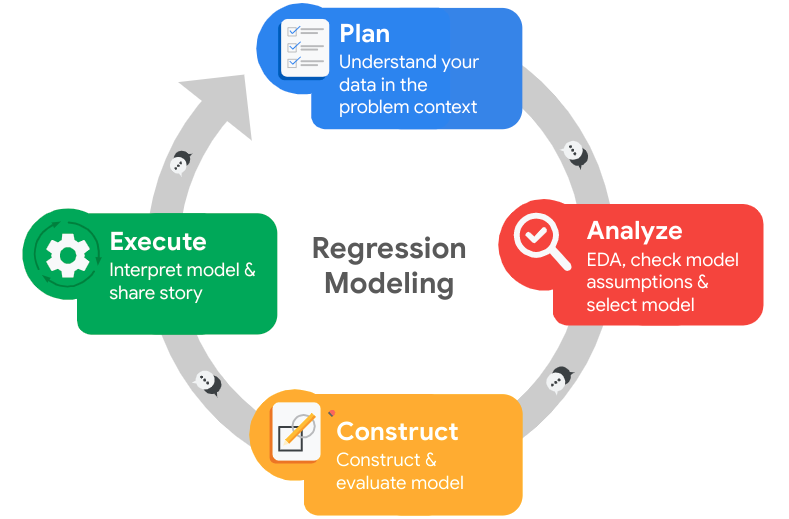

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




*  Who are your stakeholders for this project?
Human Resources department of Salifort Motors

- What are you trying to solve or accomplish?
To build a model that can predict those who are more likely to churn. Use this model and other information gleaned to improve employee retention, saving the company productivity and money.

- What are your initial observations when you explore the data?

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# data manipulation
import numpy as np
import pandas as pd

#saving models
import pickle

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#regression-based modeling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#tree modeling preparation
from sklearn.model_selection import train_test_split, GridSearchCV

#decision tree modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# random forest modeling
from sklearn.ensemble import RandomForestClassifier

#metrics and evaluation
from sklearn.metrics import precision_score, accuracy_score, recall_score,\
f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

#XGBoost modeling
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename({'average_montly_hours' : 'average_monthly_hours', 
            'Work_accident' : 'work_accident', 
            'Department' : 'department',
            'time_spend_company' : 'tenure',
            'promotion_last_5years' : 'promotion',
            'number_project' : 'n_projects'}, axis = 1)

# Display all column names after the update
### YOUR CODE HERE ###


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
n_projects               0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion                0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated() == True]

,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,tenure,work_accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head(15)

,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,tenure,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

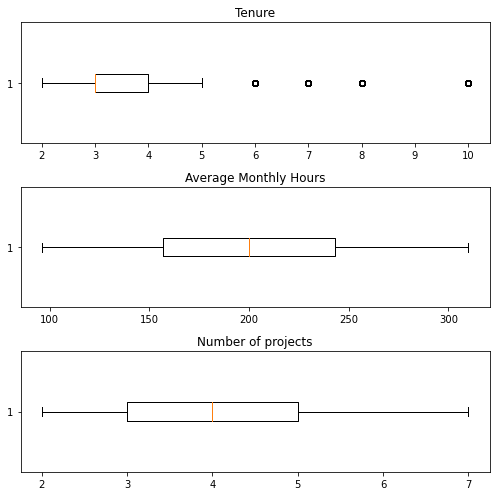

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(7,7))
axs[0].boxplot(df1['tenure'], vert = False)
axs[0].set_title('Tenure')
axs[1].boxplot(df1['average_monthly_hours'], vert = False)
axs[1].set_title('Average Monthly Hours')
axs[2].boxplot(df1['n_projects'], vert = False)
axs[2].set_title('Number of projects')
plt.tight_layout()

In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df1[df1['tenure'] > 5][['tenure']].count()

tenure    824
dtype: int64

In [14]:
#determine the number of outliers using the interquartile range(iqr)

#calculate iqr
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

#calcutate upper threshold
upper_threshold = percentile75 + (iqr * 1.5)

#locate outliers
print('Number of outliers in tenure column: %i' %df1.loc[df1['tenure'] > upper_threshold, 'tenure'].count())

Number of outliers in tenure column: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




What did you observe about the relationships between variables?
- average_monthly_hours, n_projects tend to have a positive correlation with last_evaluation, but not necessarily satisfaction_level


What do you observe about the distributions in the data?
- The variable 'tenure' has outliers that may need to be addressed, the other continuous data types had no outliers.


What transformations did you make with your data? Why did you chose to make those decisions?
- 3008 duplicated rows were removed.

What are some purposes of EDA before constructing a predictive model?
- To understand the data, prepare data for modeling and confirm it meets any model assumptions.


What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- python documentation, my notes


Do you have any ethical considerations in this stage?
- This model may identify those employees who are more likely to leave. The model will likely produce false positives, which would be those who are predicted to leave but do not. That is, this information may be used to layoff someone before they leave, and that person may also be someone who would not have left on their own. 



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
stayed = round((len(df1[df1['left'] == 0])/len(df1)*100), 2)
print('Percentage who stayed: %.1f%%' %stayed)

left = round((len(df1[df1['left'] == 1])/len(df1)*100), 2)
print('Percentage who left: %.1f%%' %left)

0    10000
1     1991
Name: left, dtype: int64
Percentage who stayed: 83.4%
Percentage who left: 16.6%


The dataset has significant class imbalance. Stratification of the y variable when splitting the data into train and test sets will be necessary.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [16]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'n_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left', 'promotion',
       'department', 'salary'],
      dtype='object')

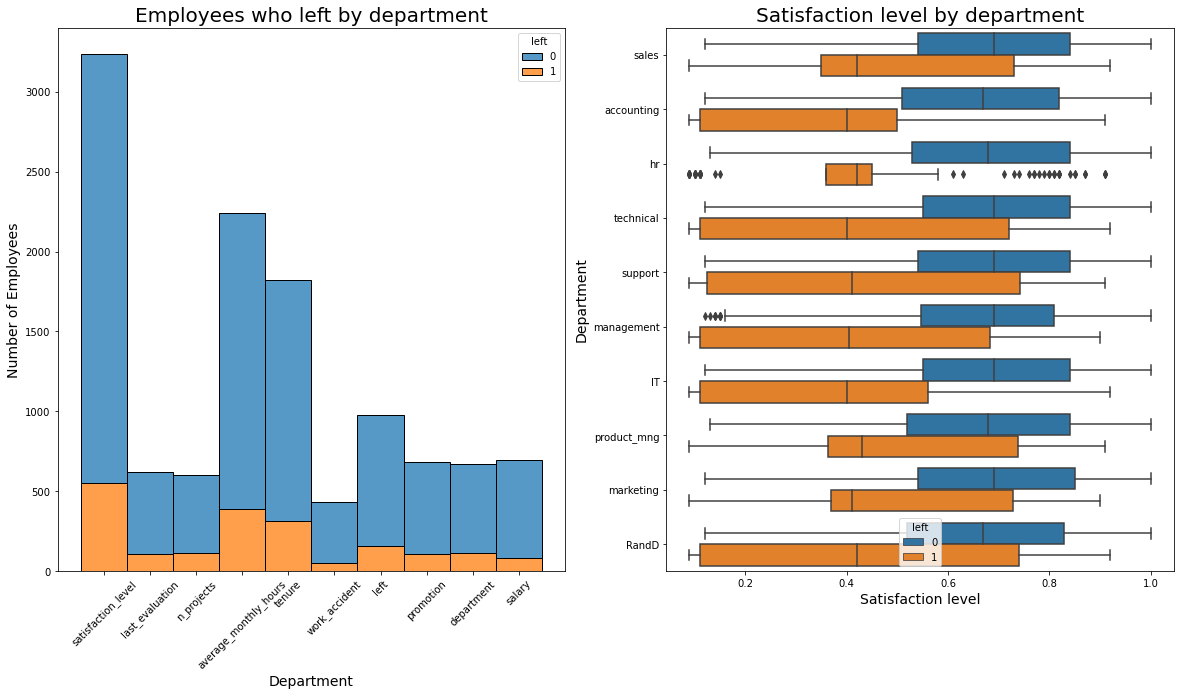

In [17]:
# Department 
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(x = df1['department'], hue = df1['left'], multiple = 'stack', ax = ax[0])
ax[0].set_xlabel('Department', fontsize=14)
ax[0].set_ylabel('Number of Employees', fontsize=14)
ax[0].set_title('Employees who left by department', fontsize=20)
ax[0].set_xticklabels(labels = df1, rotation = 45)

sns.boxplot(data = df1, x = 'satisfaction_level', y = 'department', hue = 'left', ax = ax[1])
ax[1].set_xlabel('Satisfaction level', fontsize=14)
ax[1].set_ylabel('Department', fontsize=14)
ax[1].set_title('Satisfaction level by department', fontsize=20)
plt.show()

- There is no one department that has a greater proportion of employees that leave versus employees that stay. 
- There are two departments (product_mng and marketing) that have higher distribution of satisfaction levels among those that leave, and one department(accounting) has a lower distribution of satisfaction level.
- Among those employees that leave, all departments share a similar median satisfaction level, just above 0.4.
- Among those eompoyees that stay, all departments share a similar median satisfaction level, just below 0.7.
- Using 0.4 and 0.7 as a guide, one can gan insight as to if a particular employee is likely to stay or leave.

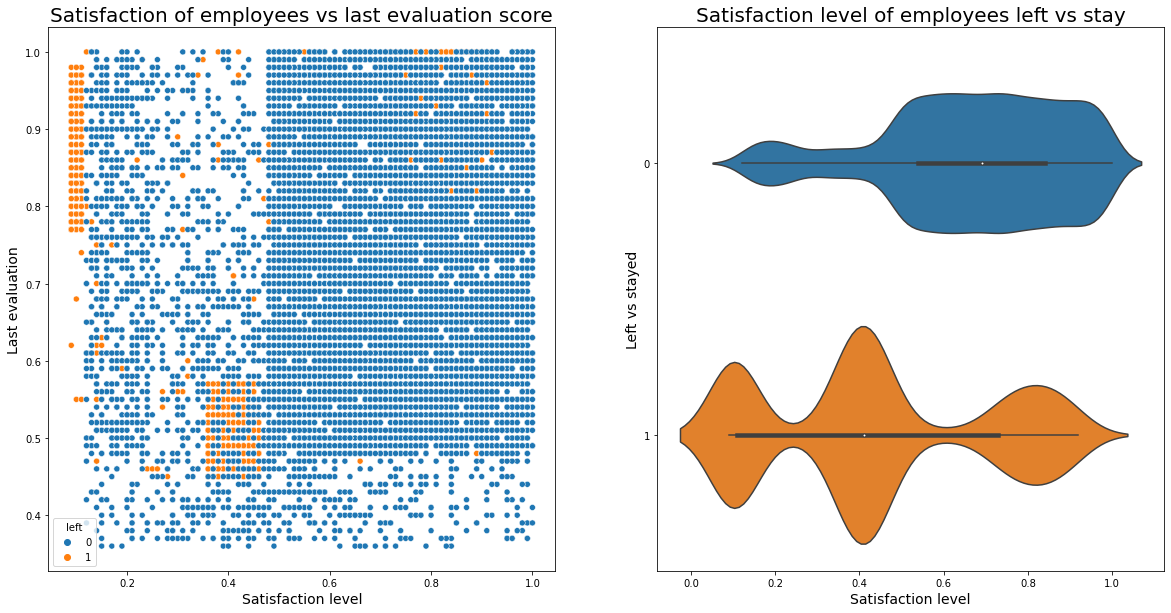

In [18]:
# Last Evaluation
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.scatterplot(data = df1, x = df1['satisfaction_level'], y = df1['last_evaluation'], hue ='left', ax=ax[0])
ax[0].set_xlabel('Satisfaction level', fontsize=14)
ax[0].set_ylabel('Last evaluation', fontsize=14)
ax[0].set_title('Satisfaction of employees vs last evaluation score', fontsize=20)

sns.violinplot(data = df1, x = 'satisfaction_level', y = 'left', orient = 'h', ax=ax[1])
ax[1].set_xlabel('Satisfaction level', fontsize=14)
ax[1].set_ylabel('Left vs stayed', fontsize=14)
ax[1].set_title('Satisfaction level of employees left vs stay', fontsize=20)
plt.show()

- There appears to be no trend between last evaluation score and satisfaction level. There are two signfiicant pockets of employees who left that have similar satisfaction levels and evaluation scores, and these pockets both had relatively low satisfaction levels.
- There is a small cluster of employees who left that had high evaluation scores and high satisfaction levels.
- Among those employees who left, there were groupings of low, medium and high levels of satisfaction.


- These groupings could be explained as: 
    1. those who had the lowest satisfaction scores but high evaluation scores: employees who performed well and may have worked long hours, but received no recognition/compensation/promotion for their effort.
    2. Those who had moderate satisfaction but had low evaluation scores: employees who may have enjoyed their work, but had issue with performance and could not meet the demands of the job.
    3. Those had high satisfaction levels and high evaluation scores: may have found other career opportunities outside the company.

Text(0.5, 1.0, 'Satisfaction level of employees by tenure')

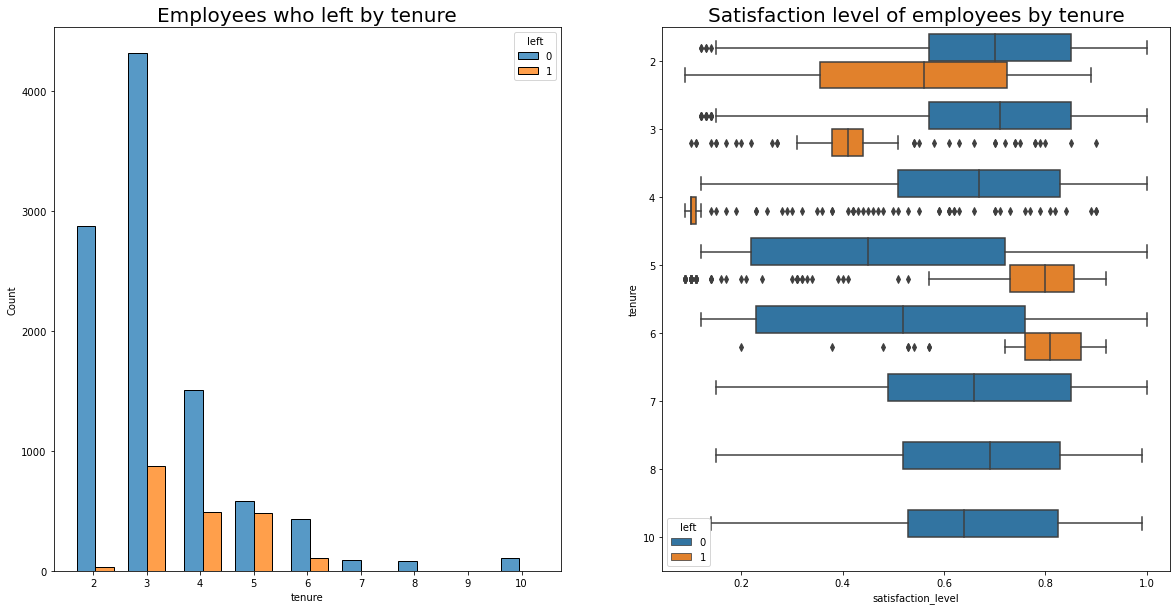

In [19]:
# Tenure

### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.histplot(data = df1, x = 'tenure', hue = 'left', multiple = 'dodge', ax = ax[0], shrink = 8)
ax[0].set_xticks(range(2,11))
ax[0].set_title('Employees who left by tenure', fontsize=20)
sns.boxplot(data = df1, y = 'tenure', x = 'satisfaction_level', hue = 'left', orient = 'h', ax=ax[1])
ax[1].set_title('Satisfaction level of employees by tenure', fontsize=20)

- The vast majority of employees had tenure of 2-4 years. 
- As tenure increased, both number of employees and those who left decreased. However the proportion of those leaving of all employees from tenure years of 3-5 increased significantly. 
- For years of tenure 7-10, there were no employees who left. 
- In employees who left, median satisfaction dropped from years 2-4, with the nadir in satisafction at year 4, then increased drastically at year 5. This could be explained by the lack of progression or promotion in those tenure years 2-4 of those who left. 
- For those who left after 4 years, median satisfaction levels were higher. These employees had higher satisfaction levels than those who stayed. These employees may have been treated well at this company, but found greater opportunity elsewhere. 

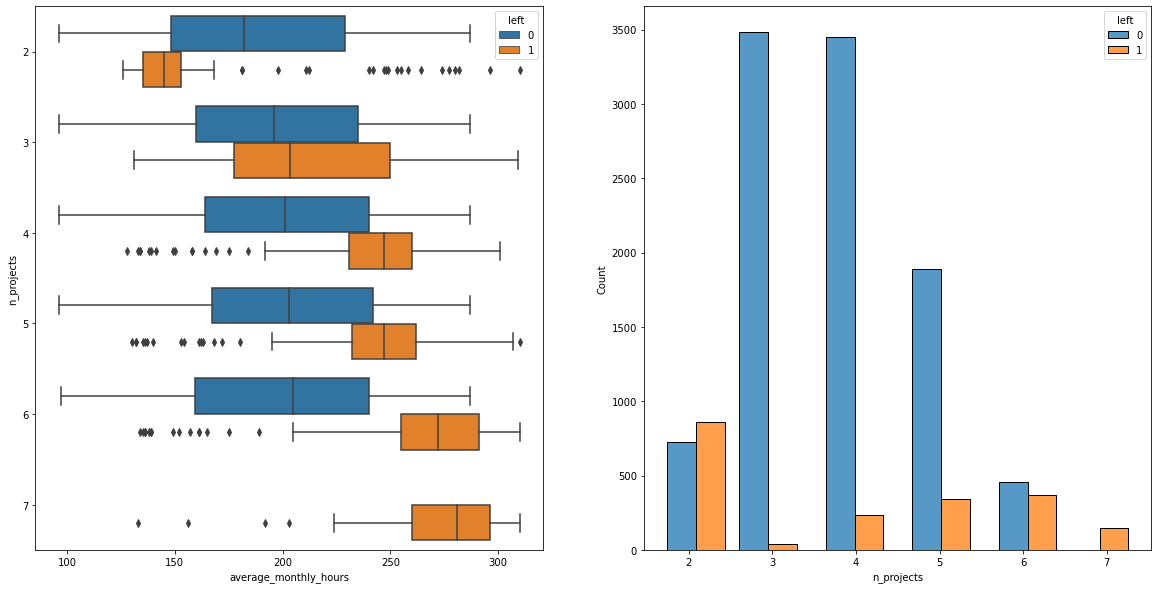

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'n_projects', hue = 'left', orient = 'h', ax = ax[0])
sns.histplot(data = df1, x = 'n_projects', hue='left', multiple = 'dodge', shrink = 4 , ax = ax[1])

These plots show a correlation between average monthly hours and number of projects, which makes sense. As number of projects increases so does hours worked. However, there are a couple other things to note:
- The  majority of employees were assigned 3-5 projects, and those who stayed worked significantly fewer hours compared to an employee who had the same number of projects but who left.
- As number of projects increased, so did the proportion of employees who left. 
- Everyone who was assigned 7 projects left, and over half of those assigned 2 projects left. Too much woork and too little work is one explanation for this.
- Those assigned three projects had the fewest number of employees who left.
- Outliers exist for employees who left at all number of projects except for 2, indicating there are other factors at play that would cause an employee to leave other than workload.

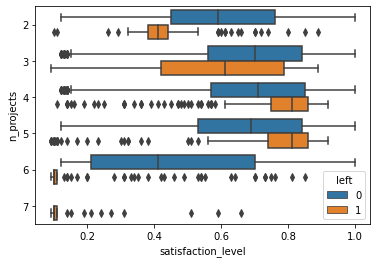

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'n_projects', hue = 'left', orient = 'h')

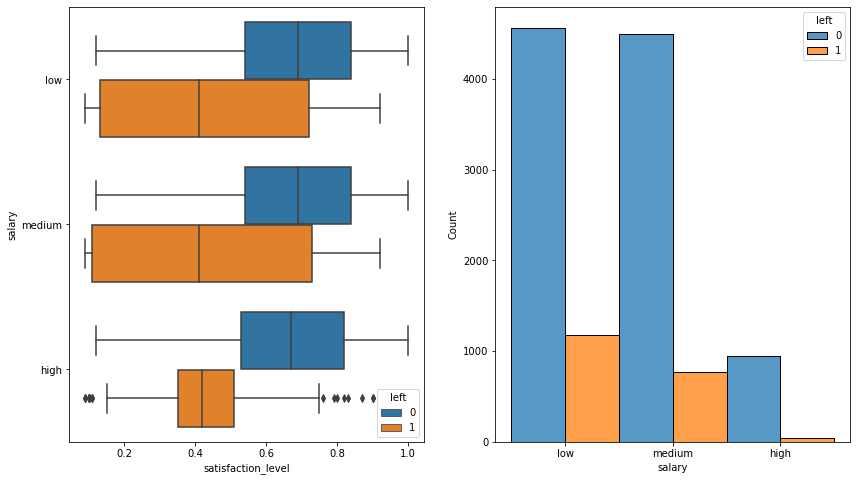

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))
sns.boxplot(data = df1, x ='satisfaction_level', y = 'salary', hue='left', orient='h', ax =ax[0])
sns.histplot(data = df1, x ='salary', hue = 'left', multiple = 'dodge', ax=ax[1])

### Insights

- The variables that most correlate with `satisfaction_level` are `left`, `tenure` and `n_projects`.
- As number of projects increased, employees who stayed decreased and those who left increased.
- Most employees leave in tenure years 3-5.
- When the correlation of `last_evaluation` and `satisfaction_level` are visualized, there are different groupings of employees who left, for presumably different reasons. Each group needs a different strategy to improve retention.
- There is no single department that generates more employee turnover.
- Satisfaction level does not appear to be corrrelated with salary.
- The number of employees who leave decreases as salary increases.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Do you notice anything odd?
- There are groupings in the scatterplot of `satisfaction_level` and `last_evaluation` that are very well defined, both for employees who left and for those who did not.


Which independent variables did you choose for the model and why?
- All variables except for `left`. Each indepedent variable is relevant to the dependent variable and can contribute to predictive classification.


Are each of the assumptions met?
- There are outliers in `tenure`, and for the logistic regression model they will be imputed with (6 * upper bound IQR)


-How well does your model fit the data?


-Can you improve it? Is there anything you would change about the model?


What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- pandas, scikit-learn, matplotlib documentation, past labs/projects, my notes


Do you have any ethical considerations in this stage?
- None besides what I discussed earlier, which was the concern that this model may be used to select employees to terminate. If it it used in such a way, there is a chance it would select those employees that actually would not leave.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification

### Identify the types of models most appropriate for this task.

Logistic regression, decision tree, random forest, xgboost forest

### ✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Modeling

Add as many cells as you need to conduct the modeling process.

### Encoding

In [162]:
#copy the dataframe for use with logistic regression modeling
df_enc=df1.copy()

In [163]:
#convert salary column string objects to ordinal numeric datatypes
df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(
    ['low', 'medium', 'high']).cat.codes
df_enc['salary']

0        0
1        1
2        1
3        0
4        0
        ..
11995    2
11996    2
11997    2
11998    2
11999    0
Name: salary, Length: 11991, dtype: int8

In [164]:
#convert department column string objects to dummy encoded values
df_enc = pd.get_dummies(df_enc, drop_first = True)
df_enc

,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,tenure,work_accident,left,promotion,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,1,0,0,0,0


### Logistic Regression

In [165]:
#remove outliers in the tenure column, as logistic regression is sensitive to them
lrm = df_enc[df_enc['tenure'] < upper_threshold]

lrm['tenure'].value_counts()

3    5190
2    2910
4    2005
5    1062
Name: tenure, dtype: int64

In [166]:
### YOUR CODE HERE ###
#outlier imputation function for use with tenure column if not wanting to remove those rows
def outlierimpute(column_list, iqr_factor):
    for col in column_list:
        percentile25 = lrm[col].quantile(0.25)
        percentile75 = lrm[col].quantile(0.75)
        iqr = percentile75 - percentile25
        
        print(col)
        print('percentile75: %.f3' %percentile75)
        print('iqr: %.f3' %iqr)
        
        upper_threshold = percentile75 + (iqr * iqr_factor)
        lrm.loc[lrm[col] > upper_threshold, col] = upper_threshold
        print(lrm[col].describe())
        print('df1 is preserved')
        print(df1[col].describe())

In [167]:
#function call of outlier impute
#outlierimpute(['tenure'], 1.5)

In [168]:
#pairplot to examine relationships between features and check for multicollinearity
%%time
pairplot = sns.pairplot(lrm[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']],
                    diag_kind = 'kde').map_lower(sns.kdeplot, levels = 4, color = '0.2')

In [169]:
#define save path for pickle models
path = '/home/jovyan/work/'

In [170]:
#with open('pairplot.pickle', 'wb') as to_write:
#    pickle.dump(pairplot, to_write)

In [1]:
#with open('pairplot.pickle', 'rb') as to_read:
#    pairplot = pickle.load(to_read)

NameError: name 'pickle' is not defined

In [173]:
corr_matrix = lrm[['satisfaction_level', 'last_evaluation', 'n_projects', 'average_monthly_hours', 'tenure',
                  'work_accident', 'left', 'promotion', 'salary']].corr()

In [1]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, ax=ax)

NameError: name 'plt' is not defined

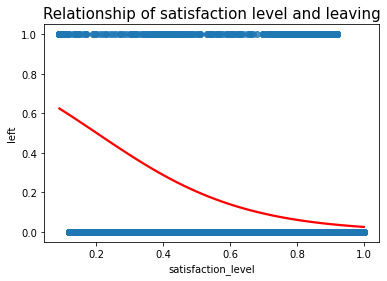

In [175]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.regplot(x = lrm['satisfaction_level'], y = lrm['left'], line_kws = {'color' : 'red'}, 
            logistic = True, ci=None)
plt.title('Relationship of satisfaction level and leaving', fontsize = 15)
plt.show()

In [176]:
#split data into the outcome variable and features
y = lrm['left']
X = lrm.drop('left', axis = 1)

In [177]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, 
                                                    stratify = y, random_state = 42)

In [178]:
#instantiate the data scaler tool
#scaler = StandardScaler().fit(X_train)

In [179]:
#scale the training data to improve model fitting
#X_train_scaled = scaler.transform(X_train)

In [180]:
#instantiate and fit the model to the training data
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
#obtain predictions on the test data
y_preds = model.predict(X_test)

In [182]:
#obtain model's result metrics for performance of prediction of leaving on the test data
precision = precision_score(y_true = y_test, y_pred = y_preds)
print('Precision: %.3f' %precision)
recall = recall_score(y_true = y_test, y_pred = y_preds)
print('Recall: %.3f' %recall)
accuracy = accuracy_score(y_true = y_test, y_pred = y_preds)
print('Accuracy: %.3f' %accuracy)
f1 = f1_score(y_true = y_test, y_pred = y_preds)
print('F1 score: %.3f' %f1)
auc = roc_auc_score(y_true = y_test, y_score = y_preds)
print('ROC AUC score: %.3f' %auc)

Precision: 0.445
Recall: 0.265
Accuracy: 0.820
F1 score: 0.332
ROC AUC score: 0.599


In [183]:
labels = ['Those who would not leave (0)', 'Those who would leave (1)']
print(classification_report(y_true = y_test, y_pred=y_preds, target_names=labels))

                               precision    recall  f1-score   support

Those who would not leave (0)       0.86      0.93      0.90      2321
    Those who would leave (1)       0.44      0.27      0.33       471

                     accuracy                           0.82      2792
                    macro avg       0.65      0.60      0.61      2792
                 weighted avg       0.79      0.82      0.80      2792



There are two different sets of metrics to consider here, one for those who would leave (1) and another for those who would not leave (0). The classifier performed quite well when predicting those who whould not leave, with precision of 86%, recall of 93% and f1 score of 90%. However, when predicting those who would leave, the classifier performed poorly, and this model should not be used to do so. 

So, in order to identify those who would leave, we could use these results to classify those who would stay, then remove them from the group of employees who would potentially leave. These employees could be targeted for remedial action, knowing that many who would not leave have been removed from said group.

In [184]:
model.intercept_

array([-1.3055752])

In [185]:
model.coef_[0]

array([-4.36411363e+00, -7.48482509e-02, -4.83484803e-01,  3.52958145e-03,
        1.09650332e+00, -1.50143680e+00, -1.14848064e+00, -5.26935926e-01,
       -2.47969130e-01, -2.18818744e-01,  8.24540321e-02, -1.30649344e-01,
       -3.44353080e-02, -1.81062946e-02,  1.03736400e-01,  1.00218485e-01,
        9.36432842e-02])

In [186]:
pd.DataFrame({'Feature' : X.columns, 
              'Coefficient(log-odds)' : model.coef_[0], 
              'Odds' : np.exp(model.coef_[0])}).reset_index(drop=True).sort_values('Odds', ascending=False)

,Feature,Coefficient(log-odds),Odds
4,tenure,1.096503,2.993680
14,department_sales,0.103736,1.109308
15,department_support,0.100218,1.105412
16,department_technical,0.093643,1.098168
10,department_hr,0.082454,1.085949
3,average_monthly_hours,0.003530,1.003536
13,department_product_mng,-0.018106,0.982057
12,department_marketing,-0.034435,0.966151
1,last_evaluation,-0.074848,0.927884
11,department_management,-0.130649,0.877525


Each of these coefficients illustrates the strength of the effect of the feature on the outcome variable, `left`. Once these coefficients were converted from log-odds to odds, their relationship to `left` is more clear. 


`satisfaction_level` has the lowest effect on increasing odds of leaving, with `work_accident` and `promotion` having the second and third largest effects respectively. Interestingly, the feature that had the highest positive correlation with leaving was `tenure`.

In [187]:
import sklearn
print(sklearn.__version__)
#unable to use the recommended roc curve display method, 
#RocCurveDisplay.from_predictions() (requires sklearn version 1.0) due to current version of sklearn.

0.22.2.post1


In [188]:
fpr, tpr, _ = roc_curve(y_true = y_test, y_score=y_preds, pos_label = model.classes_[1])

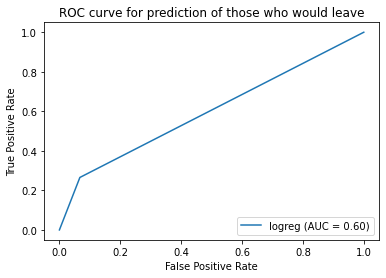

In [189]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc, estimator_name='logreg').plot()
plt.title('ROC curve for prediction of those who would leave')
plt.show()

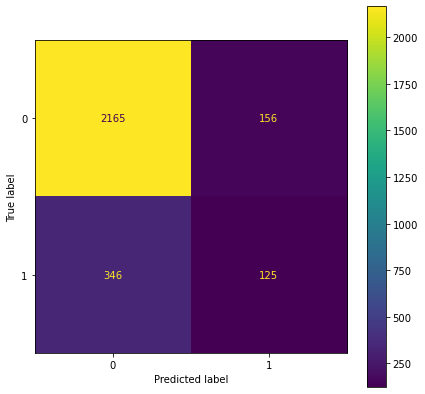

In [190]:
cm = confusion_matrix(y_true = y_test, y_pred = y_preds)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot(values_format ='')
fig = disp.figure_
fig.set_figwidth(7)
fig.set_figheight(7)

The confusion matrix shows:

* True Positive - 125 - Those who are classified as would leave and in fact  would leave
* True Negative - 2165 - Those who are classified not to leave and in fact would not leave
* False Negative - 346 - Those classified as would not leave but in fact would leave
* False Positive - 156 - Those classified as would leave but in fact would not leave

This model has a large amount of False Negatives, considerably more than True Positives. This illustrates that the model is not suited to prediction of those who would leave. However, the model has a large amount of True Negatives, far more than False Positives(6.7% of all True Negatives in test dataset), meaning this model is adept at classifying those who would not leave.

At this point, if this model was to be chosen, it could be refit to all data (X, y) to increase training and exposure to data.

### Decision Tree Round 1

In [191]:
y = df_enc['left']

In [192]:
X = df_enc.drop('left', axis=1)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, 
                                                    stratify=y, random_state=42)

In [194]:
dt = DecisionTreeClassifier(random_state=42)

In [195]:
cv_params = {'max_depth' : [10, 20, 30, None],
            'min_samples_split' : [2, 4, 6],
            'min_samples_leaf' : [1, 3, 5]
            }

In [196]:
scoring={'precision', 'accuracy', 'recall', 'f1', 'roc_auc'}

In [197]:
dt1 = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, refit='f1')

In [198]:
%%time
dt1.fit(X_train, y_train)

CPU times: user 4.44 s, sys: 3.05 ms, total: 4.45 s
Wall time: 4.45 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 20, 30, None],
                      

In [199]:
dt1.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [200]:
dt1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [201]:
dt1.best_score_

0.943100435223813

In [202]:
dt1.best_index_

1

In [203]:
def getresults(model_name:str, model_object, metric:str):
    '''
    purpose: to retrieve metrics for estimator that had the highest input metric
    parameters:
        model_name: name of model
        model_object: GridSeachCV object to search
        metric: name of metric to search by
        '''
    
    #convert input metric value to actual GridSearchCV metric name
    metric_dict = {'precision' : 'mean_test_precision',
                   'recall' : 'mean_test_recall',
                   'accuracy' : 'mean_test_accuracy',
                   'f1' : 'mean_test_f1',
                   'auc' : 'mean_test_roc_auc'}
    
    #create a dataframe of the GridSearchCV results
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    #locate and store the row with the highest input metric
    metrics = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    #create a dataframe of metrics from the row with the highest input metric
    table = pd.DataFrame({'model name' : [model_name],
                          'precision' : [metrics.mean_test_precision],
                          'recall' : [metrics.mean_test_recall],
                          'accuracy' : [metrics.mean_test_accuracy],
                          'f1' : [metrics.mean_test_f1],
                          'auc' : [metrics.mean_test_roc_auc]})
    
    return table

In [204]:
dt_results = getresults('decision tree 1', dt1, 'f1')
dt_results

,model name,precision,recall,accuracy,f1,auc
0,decision tree 1,0.965936,0.921629,0.981541,0.9431,0.959369


In [205]:
y_preds_tree = dt1.predict(X_train)

In [206]:
#create a ROC curve 
fpr, tpr, _ = roc_curve(y_true = y_train, y_score = y_preds_tree, pos_label=1)

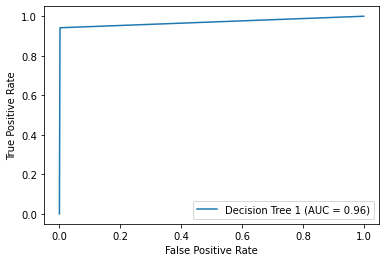

In [207]:
#display ROC curve to visualize AUC
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = 0.959, estimator_name = 'Decision Tree 1').plot()

A large AUC ROC is calculated, with a strong ROC curve.

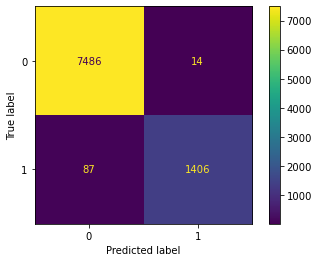

In [208]:
# create a confusion matrix to visualize classification results
cm = confusion_matrix(y_true = y_train, y_pred=y_preds_tree)
disp = ConfusionMatrixDisplay(cm, display_labels = dt1.classes_)
disp.plot(values_format='')

The decision tree is very accurate, correctly classifying 98% of all datapoints in the test set.
* True Negatives - 7486
* True Positives - 1406
* False Negatives - 87
* False Positives - 14

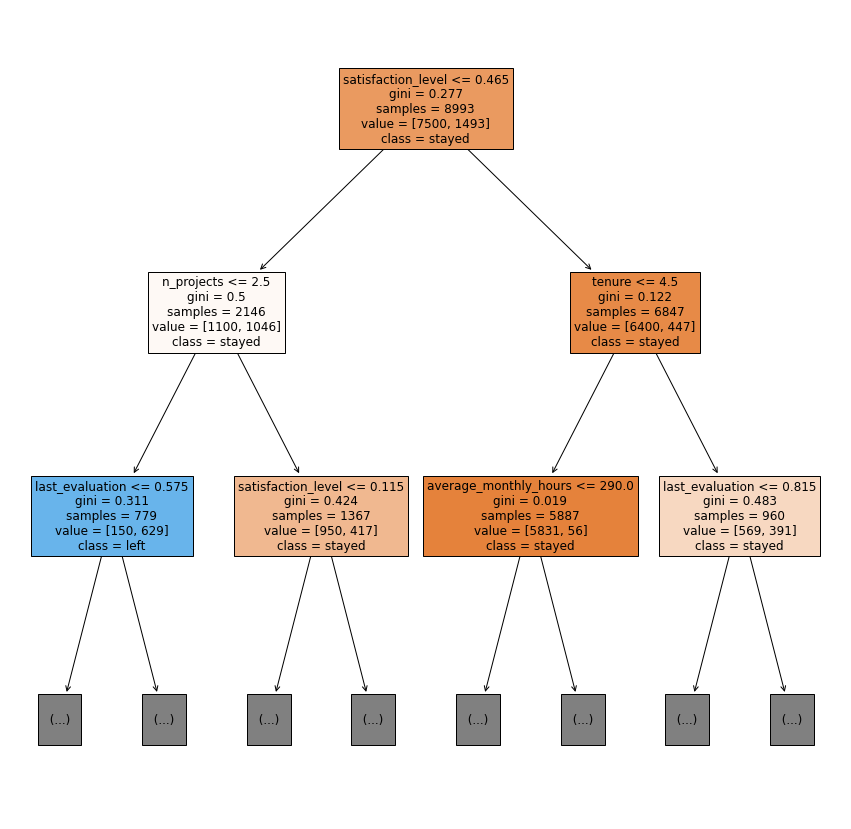

In [209]:
#create a tree plot to visualize the most important features
plt.figure(figsize=(15,15))
plot_tree(dt1.best_estimator_, max_depth = 2, feature_names = X.columns, fontsize=12, 
          class_names = {1 : 'left', 0 : 'stayed'}, filled = True)
plt.show()

The highest impact variables on `left` are `satisfaction_level`, `tenure`, and `n_projects`. 

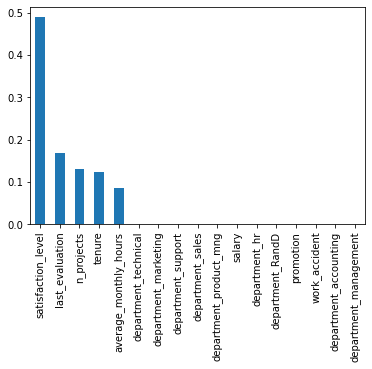

In [216]:
importances = dt1.best_estimator_.feature_importances_
tree_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)

Decision Trees are prone to overfitting, so these high scores should be interpreted with some skepticism. Introducing multiple weak learners addresses this issue in ensemble learning. Next, we will build a random forest model.

### Random Forest Round 1

In [217]:
#isolate features and outcome variable
X = df_enc.drop('left', axis =1)
y = df_enc['left']

In [218]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, 
                                                    stratify=y, random_state=42)

In [219]:
#create a dictionary of parameter values to test
cv_params = {'n_estimators':[50, 100, None],
             'max_depth':[10,50],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[2, 4, 6],
             'max_features':['sqrt'],
             'max_samples':[0.5, 0.8]
            }

In [220]:
#list of scoring metrics to calculate
scoring={'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

In [221]:
#instantiate classifier object
rf = RandomForestClassifier(random_state=42)

In [222]:
#search through parameter values to determine optimal combination
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [223]:
#%%time
#fit the classifier to the data
#rf1 = rf1.fit(X_train, y_train) #1min 47sec wall time

In [224]:
#with open(path + 'rf1.pickle', 'wb') as to_write:
#    pickle.dump(rf1, to_write)

In [225]:
with open(path + 'rf1.pickle', 'rb') as to_read:
    rf1 = pickle.load(to_read)

In [226]:
rf1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [227]:
rf1.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [228]:
#user defined function getresults to retrieve and display scoring metrics on train set
rf_results = getresults('random forest 1', rf1, 'f1')
rf_results

,model name,precision,recall,accuracy,f1,auc
0,random forest 1,0.987663,0.908902,0.982987,0.94662,0.97985


In [229]:
y_preds_rf = rf1.predict(X_train)

In [230]:
#calculate true positive and false positive rates for roc curve
fpr, tpr, _ = roc_curve(y_true=y_train, y_score = y_preds_rf, pos_label=1)

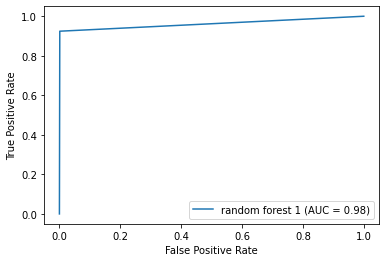

In [231]:
#display roc auc plot
RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=0.98, estimator_name='random forest 1').plot()

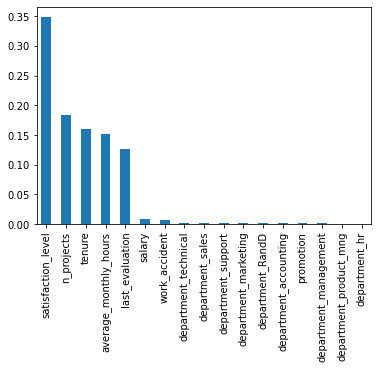

In [235]:
importances_rf1 = rf1.best_estimator_.feature_importances_
forest_importances = pd.Series(importances_rf1, index=X.columns).sort_values(ascending=False)
forest_importances.plot.bar()

In [ ]:
#create confusion matrix to visualize classifications
cm = confusion_matrix(y_true=y_train, y_pred=y_preds_rf)
disp = ConfusionMatrixDisplay(cm, display_labels=rf1.classes_)
disp.plot(values_format='')

In [ ]:
dt_results.merge(rf_results, how='outer')

The random forest model scores higher in all metrics but recall. Higher precision means the rf model correctly classifies more of those who would leave, which is the business objective. With the addition of decreased bias and variance in the random forest model, it is superior to the decision tree.

In [ ]:
def get_scores(model_name:str, model_object, X_test_data, y_test_data):
    
   '''function designed to retrieve model scores on test data''' 

    y_preds = model_object.predict(X_test_data)
    
    precision = precision_score(y_true=y_test_data, y_pred=y_preds)
    recall = recall_score(y_true=y_test_data, y_pred=y_preds)
    accuracy = accuracy_score(y_true=y_test_data, y_pred=y_preds)
    f1 = f1_score(y_true = y_test_data, y_pred=y_preds)
    auc = roc_auc_score(y_true=y_test_data, y_score=y_preds)
    
    table = pd.DataFrame({'model name' : [model_name],
                         'precision': [precision],
                         'recall' : [recall],
                         'accuracy' : [accuracy],
                         'f1' : [f1],
                         'auc' : [auc]})
    return table

In [ ]:
get_scores('random forest', rf1, X_test, y_test)

These are very strong scores, and since this model has not seen the holdout set, we can be confident that this model would perform as well on new, unseen data. 

### Feature Engineering 

These scores are quite high, especially a 99% precision. What is going on? Perhaps some data leakage is occurring. Data that would not normally be available or data that is biased is training these models to high metric scores. For example, the company may not have all employee's satisfaction scores, and those employees who have decided to quit or are identified as an employee to terminate may be working less hours.

We can add a variable designating whether an employee is overworked. An employee who works 50 weeks per year, 40 hours per week works 166.67 hours per month on average. We can define overworked as an employee who works approximately 8 hours more than this, 175 hours.

The first round of modeling used all variables, and this round will utilize feature engineering to build improved models.

In [237]:
#drop satisfaction from dataset
df_fe = df_enc.drop('satisfaction_level', axis=1)

In [238]:
#copy average_monthly_hours to create overworked column
df_fe['overworked'] = df_fe['average_monthly_hours']

In [239]:
df_fe['overworked'] = (df_fe['overworked'] >= 175).astype(int)

In [240]:
df_fe = df_fe.drop('average_monthly_hours', axis=1)

### Prepare engineered dataset

In [241]:
#isolate features
X = df_fe.drop('left', axis=1)

In [242]:
#isolate outcome variable
y = df_fe['left']

In [243]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, 
                                                    stratify=y, random_state=42)

### Decision Tree Round 2

In [244]:
dt_fe = DecisionTreeClassifier(random_state=42)

In [245]:
cv_params = {'max_depth' : [10, 20, 30, None],
            'min_samples_split' : [2, 4, 6],
            'min_samples_leaf' : [1, 3, 5]}

In [246]:
scoring = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

In [247]:
dt2 = GridSearchCV(dt_fe, cv_params, scoring, cv=5, refit='roc_auc')

In [248]:
%%time
dt2.fit(X_train, y_train)

CPU times: user 3.25 s, sys: 0 ns, total: 3.25 s
Wall time: 3.25 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 20, 30, None],
                      

In [249]:
dt2.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [250]:
dt2.best_score_

0.9486253222898103

In [251]:
dt2_results = getresults('decision tree 2', dt2, 'auc')

### Random Forest Round 2

In [252]:
#instantiate random forest classifier object
rf_fe = RandomForestClassifier(random_state=42)

In [253]:
#create dictionary of parameters for GridSearch to iterate over
cv_params = {'n_estimators':[50, 100, 150],
             'max_depth':[10,50],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[2, 4, 6],
             'max_features':['sqrt'],
             'max_samples':[0.5, 0.8]
            }

In [254]:
#list of scoring metrics for GridSearchCV
scoring = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

In [255]:
#instantiate the random forest 2 gridsearch object to search for best parameters on scoring metric
rf2 = GridSearchCV(rf_fe, cv_params, scoring=scoring, cv=5, refit ='roc_auc')

In [256]:
#%%time
#fit the random forest 2 model
#rf2.fit(X_train, y_train)

In [257]:
#with open(path + 'rf2.pickle', 'wb') as to_write:
#    pickle.dump(rf2, to_write)

In [258]:
with open(path + 'rf2.pickle', 'rb') as to_read:
    rf2 = pickle.load(to_read)

In [259]:
rf2.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 50}

In [260]:
rf2.best_score_

0.9700261333453046

In [261]:
rf2_results = getresults('random forest 2', rf2, 'auc')

In [280]:
results2 = dt2_results.merge(rf2_results, how='outer')

### Bonus model: xgboost

In [263]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [264]:
scoring = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

In [265]:
cv_params = {'n_estimators': [15, 20, 25],
             'max_depth' : [6, 8, 10],
             'learning_rate': [0.1, 0.2, 0.3],
             'subsample': [0.7],
             'colsample_bytree': [0.7],
             'min_child_weight': [3, 5]
             }

In [266]:
xgb = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [267]:
#%%time
#xgb.fit(X_train, y_train)

CPU times: user 1min 16s, sys: 600 ms, total: 1min 17s
Wall time: 38.9 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3],

In [268]:
#with open(path + 'xgb.pickle', 'wb') as to_write:
#    pickle.dump(xgb, to_write)

In [269]:
with open(path + 'xgb.pickle', 'rb') as to_read:
    xgb = pickle.load(to_read)

In [270]:
xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 25,
 'subsample': 0.7}

In [271]:
xgb.best_score_

0.9729417095014703

In [272]:
xgb_results = getresults('xgb model', xgb, 'auc')

In [273]:
results2.merge(xgb_results, how='outer')

,model name,precision,recall,accuracy,f1,auc
0,decision tree 2,0.900140,0.860681,0.960970,0.879810,0.948625
1,random forest 2,0.907434,0.866717,0.963193,0.886575,0.970026
2,xgb model,0.907479,0.880101,0.965195,0.893514,0.972942


The xgboosted ensemble performs slightly better than the random forest model in all metrics. We will use this model to predict on test data, calculate final metrics, and present to stakeholders.

### Test and evaluate champion model

In [274]:
#predict on test set
y_preds_xgb = xgb.predict(X_test)

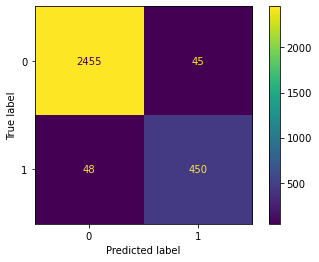

In [275]:
#create confusion matrix to visualize classification results
cm = confusion_matrix(y_true = y_test, y_pred=y_preds_xgb)
disp = ConfusionMatrixDisplay(cm, display_labels = xgb.classes_)
disp.plot(values_format='')

In [276]:
#create ROC curve
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_preds_xgb, pos_label=1)

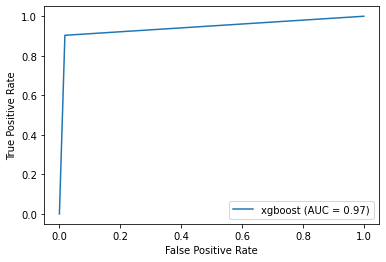

In [277]:
#Display ROC AUC curve
RocCurveDisplay(tpr=tpr, fpr=fpr, roc_auc=0.97, estimator_name = 'xgboost').plot()

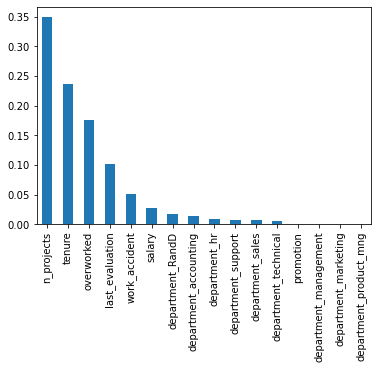

In [278]:
importances_xgb = xgb.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances_xgb, index=X.columns).sort_values(ascending = False)
xgb_importances.plot.bar()

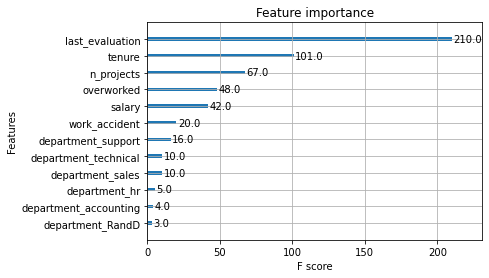

In [282]:
plot_importance(xgb.best_estimator_)

In [281]:
get_scores('xgb champion model', xgb, X_test, y_test)

,model name,precision,recall,accuracy,f1,auc
0,xgb champion model,0.909091,0.903614,0.968979,0.906344,0.942807


The xgb ensemble posts some strong scores on holdout data, which is a good indicator that it would perform comparably on new, unseen data. 

The model classifies:
- True Negatives - 2455
- True Positives - 450
- False Positives - 45
- False Negatives - 48

The most important features ranked by total decrease in gini impurity:
1. n_projects
2. tenure
3. overworked
4. last_evaluation

The most important features ranked by F score:
1. last_evaluation
2. tenure
3. n_projects
4. overworked

The xgb ensemble will be presented as the final model to productionize to stakeholders. It should be noted that for this particular modeling technique, how it arrives at its results are unclear and difficult to understand or explain. Fortunately, these details do no have to be known in order for it to make accurate predictive classifications.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The xgb model performs slightly better than the random forest, which outperformed the decision tree. The ROC AUC for the xgb on the train set is 0.97, which dropped to 0.94 on the test set. Both are high scores, and we can be confident this model will accurately predict the large majority of those employees who will leave. 

By two ranking measures, the four most important features in the xgb model were n_projects, tenure, last_evaluation, and overworked(defined as working 175 or more hours/month).

In the test data, the model:
- correctly classifies 97% (2905) of 2998 total observations 
- correctly classifies 91% (450) of 498 total true positives(those who would leave)

### Conclusion, Recommendations, Next Steps

Taken from above insights from EDA visualizations:

- The variables that most correlate with `satisfaction_level` are `left`, `tenure` and `n_projects`.
- As number of projects increased, employees who stayed decreased and those who left increased.
- Most employees leave in tenure years 3-5.
- Satisfaction is lowest in tenure year 4.
- When the correlation of `last_evaluation` and `satisfaction_level` are visualized, there are different groupings of employees who left, for presumably different reasons. Each group needs a different strategy to improve retention.
- There is no single department that generates more employee turnover.
- Satisfaction level does not appear to be corrrelated with salary categories.
- The number of employees who leave decreases as salary increases.

This model should serve the needs of the Salifort Motors HR department in their task of identifiying those who would leave. In addition, the analysis illustrates that the employees at this coportation are overworked, causing high turnover rates.

The corporation should consider:
- setting limits on average monthly hours worked.
- providing mentorship and guidance to those who score low on evaluations to identify weaknesses and improve them.
- increasing salary and incentives during tenure years 3-5, which is when employees are most likely to leave. These employees are gaining significant knowledge of the business and skill at performing their job, and losing them (to competition) is costly.
- setting a recommended range(3-5) of projects worked. Allow an employee to increase this by 1-2 for a temporary period if they are a strong performer and if they choose to do so. Provide fair reward for such work.
- administer quarterly or biannual surveys to keep tabs on the health of employee satisfaction.

**Next Steps**
- Evaluations are performed infrequently, and as such, predicting without them may prove useful. Removing last_evaluation from the analysis may be prudent to provide more accessible analysis.
- Consider predicting satisfaction_level or evaluation_score to see if those employees who leave can be predicted from these.
- In addition, building a K-means model to cluster the data may provide further insight. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.